# **Hierarchical Clustering**

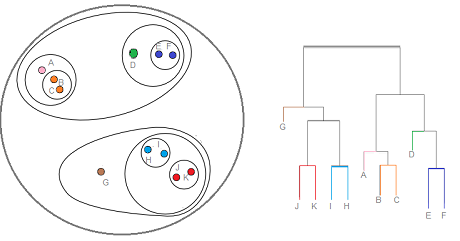

## ***IMPORTING LIBRARIES***

In [10]:
import numpy as np
import pandas as pd

## ***LOADING THE DATASET***

In [11]:
data = pd.read_csv("segmented_customers.csv")

## ***SUMMARIZING THE DATASET***

In [12]:
print(data.shape)
print(data.describe())
print(data.head())

(200, 6)
       CustomerID         Age  ...  Spending Score (1-100)    cluster
count  200.000000  200.000000  ...              200.000000  200.00000
mean   100.500000   38.850000  ...               50.200000    2.24500
std     57.879185   13.969007  ...               25.823522    1.81423
min      1.000000   18.000000  ...                1.000000    0.00000
25%     50.750000   28.750000  ...               34.750000    1.00000
50%    100.500000   36.000000  ...               50.000000    2.00000
75%    150.250000   49.000000  ...               73.000000    4.00000
max    200.000000   70.000000  ...               99.000000    5.00000

[8 rows x 5 columns]
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  cluster
0           1    Male   19                  15                      39        4
1           2    Male   21                  15                      81        3
2           3  Female   20                  16                       6        4
3           4  Fema

## ***SEGREGRATING AND ZIPPING THE DATASET***

In [14]:
input  = data["Annual Income (k$)"].values
output = data["Spending Score (1-100)"].values

x      = np.array(list(zip(input,output)))
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## ***FINDING THE OPTIMAL NUMBER OF CLUSTERS USING DENDROGRAM***

Text(0, 0.5, 'EUCLIDEAN DISTANCES')

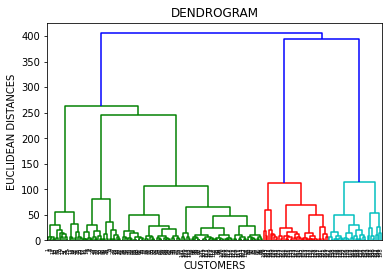

In [19]:
import scipy.cluster.hierarchy as den
import matplotlib.pyplot as plt

dendrogram = den.dendrogram(den.linkage(x,method="ward"))
plt.title("DENDROGRAM")
plt.xlabel("CUSTOMERS")
plt.ylabel("EUCLIDEAN DISTANCES")

## ***TRAINIING THE DATASET AND PREDICTING THE RESULT USING THE OPTIMAL NUMBER OF CLUSTERS BASED ON THE RESULT OF DENDROGRAM***

In [20]:
from sklearn.cluster import AgglomerativeClustering

Hierarchical_Model = AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="ward")

y = Hierarchical_Model.fit_predict(x)

In [21]:
y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

## ***VISUALIZING THE CLUSTERS***

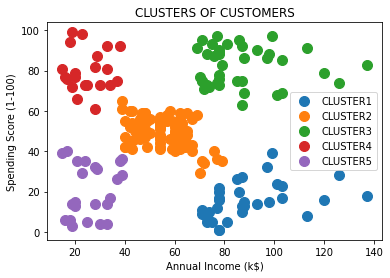

In [39]:
plt.scatter(x[y==0,0],x[y==0,1],s=100,label="CLUSTER1")
plt.scatter(x[y==1,0],x[y==1,1],s=100,label="CLUSTER2")
plt.scatter(x[y==2,0],x[y==2,1],s=100,label="CLUSTER3")
plt.scatter(x[y==3,0],x[y==3,1],s=100,label="CLUSTER4")
plt.scatter(x[y==4,0],x[y==4,1],s=100,label="CLUSTER5")
plt.title("CLUSTERS OF CUSTOMERS")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
